In [938]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
from sklearn.linear_model import RidgeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import Word

In [939]:
df = pd.read_csv("Restaurant_Reviews.csv", error_bad_lines=False)

b'Skipping line 15: expected 2 fields, saw 4\nSkipping line 20: expected 2 fields, saw 3\nSkipping line 23: expected 2 fields, saw 3\nSkipping line 29: expected 2 fields, saw 3\nSkipping line 30: expected 2 fields, saw 3\nSkipping line 32: expected 2 fields, saw 4\nSkipping line 35: expected 2 fields, saw 3\nSkipping line 36: expected 2 fields, saw 3\nSkipping line 39: expected 2 fields, saw 3\nSkipping line 45: expected 2 fields, saw 3\nSkipping line 46: expected 2 fields, saw 3\nSkipping line 49: expected 2 fields, saw 3\nSkipping line 51: expected 2 fields, saw 3\nSkipping line 55: expected 2 fields, saw 3\nSkipping line 57: expected 2 fields, saw 4\nSkipping line 60: expected 2 fields, saw 3\nSkipping line 61: expected 2 fields, saw 3\nSkipping line 67: expected 2 fields, saw 3\nSkipping line 72: expected 2 fields, saw 3\nSkipping line 75: expected 2 fields, saw 3\nSkipping line 76: expected 2 fields, saw 4\nSkipping line 92: expected 2 fields, saw 3\nSkipping line 93: expected 2 f

In [940]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1.0
1,Crust is not good.,0.0
2,Not tasty and the texture was just nasty.,0.0
3,Stopped by during the late May bank holiday of...,1.0
4,The selection on the menu was great and so wer...,1.0


# Veri Ön İşleme

In [941]:
#Noktalama İşaretlerinin ve Sayıların Silinmesi
df["Review"] = df["Review"].str.replace("[^\w\s]","")
df["Review"] = df["Review"].str.replace("\d","")

<ipython-input-941-09e6cb806dd9>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Review"] = df["Review"].str.replace("[^\w\s]","")
<ipython-input-941-09e6cb806dd9>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Review"] = df["Review"].str.replace("\d","")


In [942]:
#Büyük-Küçük Harf
df["Review"] = df["Review"].apply(lambda x: " ".join(x.lower() for x in x .split()))

In [943]:
#StopWordslerin Silinmesi
sw=stopwords.words("english")
df["Review"] = df["Review"].apply(lambda x: " ".join(x for x in x.split() if x not in sw)) 

In [944]:
#Az Geçen Kelimelerin Silinmesi
pd.Series(" ".join(df["Review"]).split()).value_counts()
sil =pd.Series(" ".join(df["Review"]).split()).value_counts()[-900:]
df["Review"] = df["Review"].apply(lambda x: " ".join(x for x in x.split() if x not in sil))

In [945]:
#Lemmatization
nltk.download("wordnet")
df["Review"] = df["Review"].apply(lambda x: " ".join(Word(word).lemmatize() for word in x.split()))
df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Zehra\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Review,Liked
0,wow loved place,1.0
1,crust good,0.0
2,tasty texture nasty,0.0
3,may recommendation loved,1.0
4,selection menu great price,1.0


In [946]:
df.isnull().sum()

Review     0
Liked     12
dtype: int64

# Metin Görselleştirme

In [947]:
#Barplot

In [948]:
frekans=(df["Review"]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()

In [949]:
frekans.columns=["words", "tf"]

In [950]:
frekans.head()

,words,tf
0,place,73.0
1,loved,7.0
2,wow,3.0
3,good,55.0
4,crust,2.0


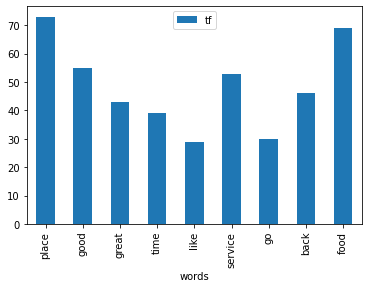

In [951]:
a=frekans[frekans["tf"]>25]
a.plot.bar(x="words",y="tf");

In [952]:
#WordCloud

In [953]:
!pip install Wordcloud

In [954]:
text= " ".join(i for i in df.Review)

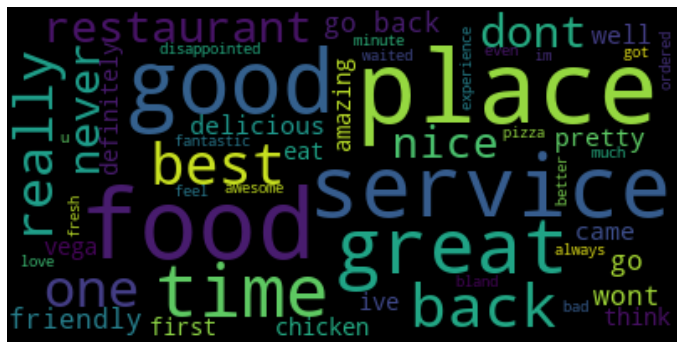

In [960]:
wordcloud=WordCloud(max_font_size=60, max_words=50, background_color="black").generate(text)
plt.figure(figsize=[12,12])
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

# Öznitelik Çıkarımı

In [961]:
cv = CountVectorizer(max_features = 1000)

In [962]:
x = cv.fit_transform(df["Review"]).toarray()

# Makine Öğrenmesi

In [966]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [967]:
count = 0
for i in y_train:
     
    if(pd.isna(i)):
        print(y_train[count])
        y_train[count] = 0
    count +=1

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [968]:
count = 0
for i in y_test:
     
    if(pd.isna(i)):
        print(y_train[count])
        y_test[count] = 0
    count +=1 

1.0
0.0


### Naive Bayes

In [969]:
gnb = GaussianNB()

In [970]:
gnb.fit(x_train,y_train)

GaussianNB()

In [971]:
y_pred = gnb.predict(x_test)

In [972]:
confusion_matrix(y_test,y_pred)

array([[44, 34],
       [ 4, 62]], dtype=int64)

In [973]:
accuracy_score(y_test, y_pred)

0.7361111111111112

### Lojistik Regresyon

In [974]:
lr=linear_model.LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [975]:
y_pred1 = lr.predict(x_test)

In [976]:
confusion_matrix(y_test,y_pred1)

array([[61, 17],
       [13, 53]], dtype=int64)

In [977]:
accuracy_score(y_test, y_pred1)

0.7916666666666666

### XGBoost

In [978]:
xgboost = XGBClassifier()
xgboost.fit(x_train, y_train)

C:\Users\Zehra\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:04:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [980]:
y_pred4 = xgboost.predict(x_test)

In [981]:
confusion_matrix(y_test, y_pred4)

array([[60, 18],
       [22, 44]], dtype=int64)

In [982]:
accuracy_score(y_test, y_pred4)

0.7222222222222222

### Ridge Classifier

In [983]:
ridge = RidgeClassifier()

In [986]:
ridge.fit(x_train, y_train)

RidgeClassifier()

In [987]:
y_pred5 = ridge.predict(x_test)

In [988]:
confusion_matrix(y_test, y_pred5)

array([[56, 22],
       [13, 53]], dtype=int64)

In [989]:
accuracy_score(y_test, y_pred5)

0.7569444444444444

### Stacking

In [990]:
voting_clf = VotingClassifier(estimators= [("xgboost", xgboost), ("gnb", gnb), ("lr", lr), ("ridge", ridge)], voting="hard")

In [991]:
voting_clf.fit(x_train, y_train)

C:\Users\Zehra\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:04:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('xgboost',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.300000012,
                                            max_delta_step=0, max_depth=6,
                                            min_child_weight=1, missing=nan,
                                            monotone_constraints='()',
                                            n_estimators=100, n_jobs=4,
                                            num_parallel_tree=1, random_state=0,
                                            reg_alpha=0, reg_lambda=1,
          

In [992]:
y_pred6 = voting_clf.predict(x_test)

In [993]:
confusion_matrix(y_test, y_pred6)

array([[64, 14],
       [13, 53]], dtype=int64)

In [994]:
accuracy_score(y_test, y_pred6)

0.8125

In [995]:
#Deneme

In [996]:
yorum='wow loved place'

In [997]:
yorum

'wow loved place'

In [998]:
yorum1=[]
yorum1.append(yorum)

In [999]:
yorum2=cv.transform(yorum1)

In [1001]:
yorum3 =yorum2.toarray()

In [1002]:
voting_clf.predict(yorum3)

array([1.])

In [ ]:
#Deneme

In [1003]:
yeni_yorum=df["Review"][1]

In [1004]:
yeni_yorum

'crust good'

In [1005]:
yeni_yorum1=[]
yeni_yorum1.append(yeni_yorum)

In [1007]:
yeni_yorum2=cv.transform(yeni_yorum1)

In [1009]:
yeni_yorum3 = yeni_yorum2.toarray()

In [1011]:
voting_clf.predict(yeni_yorum3)

array([0.])

In [ ]:
#Deneme

In [1018]:
a="delicious"

In [1019]:
a1=[]
a1.append(a)

In [1020]:
a2=cv.transform(a1)

In [1022]:
a3 = a2.toarray()

In [1023]:
voting_clf.predict(a3)

array([1.])